In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
# import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


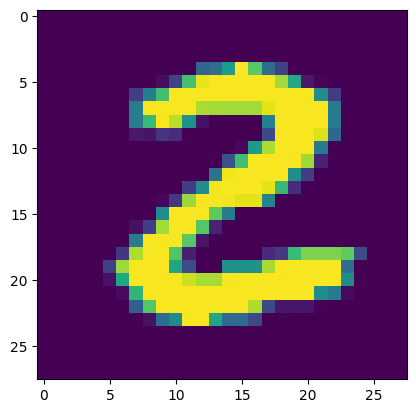

2


In [ ]:
plt.imshow(X_train[25])
plt.show()

print(Y_train[25])

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3249 - accuracy: 0.9097
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1645 - accuracy: 0.9529
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1235 - accuracy: 0.9644
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1008 - accuracy: 0.9704
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9745
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0738 - accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0649 - accuracy: 0.9800
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0575 - accuracy: 0.9821
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9841
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.045

In [ ]:
loss, accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9708


In [ ]:
print(accuracy)

0.97079998254776


In [ ]:
print(X_test.shape)

(10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

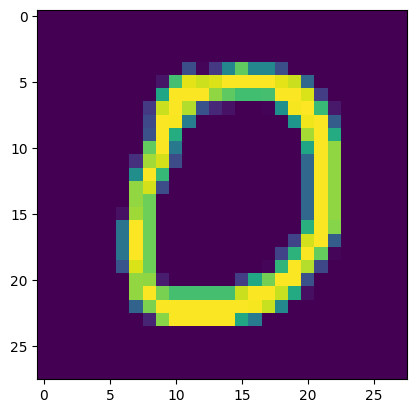

In [ ]:
plt.imshow(X_test[10])
plt.show

In [ ]:
print(Y_test[10])

0


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred[10])

[9.9535006e-01 9.3121544e-06 2.0555098e-01 5.6310295e-04 1.8927423e-12
 5.0271776e-02 8.8087646e-03 7.8188404e-03 2.9299408e-04 3.7658316e-04]


In [ ]:
label_for_first_test_image = np.argmax(Y_pred[10])
print(label_for_first_test_image)

0


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 952    0    2    2    2   10    5    5    2    0]
 [   0 1128    4    0    0    0    1    0    2    0]
 [   4    3  996    8    5    1    5    5    4    1]
 [   1    1    3  975    1   11    0    7    5    6]
 [   1    0    1    0  953    2    5    5    1   14]
 [   2    0    0    4    1  879    3    0    2    1]
 [   1    3    3    2    5   12  928    1    3    0]
 [   0    6    8    3    1    0    0 1001    3    6]
 [   0    1    2   16    4   12    2    4  929    4]
 [   2    5    0   11    6    3    1    9    5  967]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

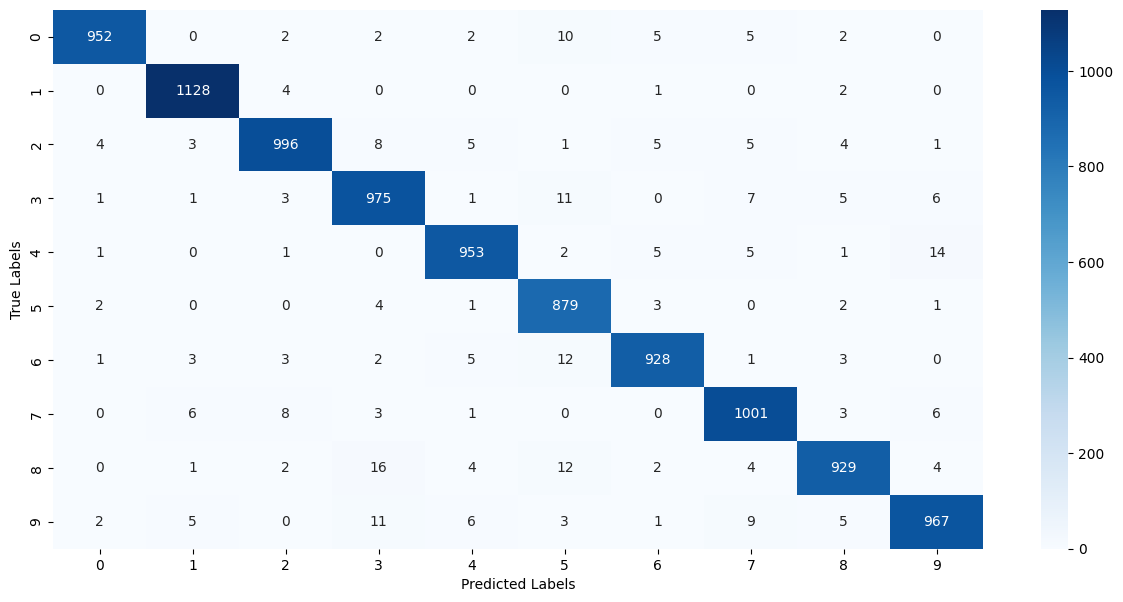

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt ='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
input_image_path = r"C:\Users\prash\Downloads\MNIST_digit.png"

In [ ]:
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

NoneType

In [ ]:
input_image_path = '/content/MNIST_digit.png'

In [ ]:
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


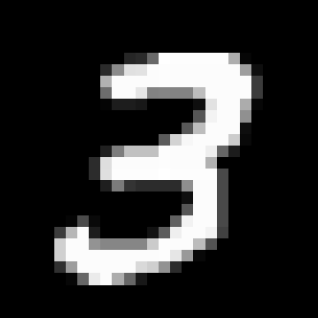

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
 input_prediction = model.predict(image_reshaped)
 print(input_prediction)

1/1 [==============================] - 0s 84ms/step
[[7.0655974e-09 7.5944222e-04 2.3111438e-03 9.9999869e-01 1.6593846e-15
  6.1308332e-03 2.9369764e-16 1.0442930e-04 8.7403343e-05 5.5956218e-02]]


In [ ]:
input_prediction_label = np.argmax(input_prediction)

In [ ]:
print(input_prediction_label)

3


built the predictive system

Path of the image is to be predicted: /content/MNIST_digit.png


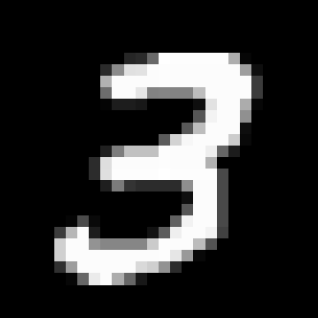

1/1 [==============================] - 0s 37ms/step
The hand printed digit is recognised as  3


In [ ]:
input_image_path = input('Path of the image is to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_prediction_label = np.argmax(input_prediction)

print('The hand printed digit is recognised as ', input_prediction_label)